In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as ss

In [3]:
conversion = pd.read_csv("conversion.csv")

In [4]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
conversion.shape

(1143, 11)

In [19]:
conversion.fb_campaign_id.nunique()

691

In [11]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [16]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [33]:
conversion_fb = conversion.groupby("fb_campaign_id", as_index = False).agg({"Impressions":"sum"})

In [43]:
conversion_fb.Impressions = np.log(conversion_fb.Impressions)

In [44]:
conversion_fb.head()

,fb_campaign_id,Impressions
0,11.551338,8.902456
1,11.551348,9.790375
2,11.551377,6.541030
3,11.551454,9.035034
4,11.551463,7.557473


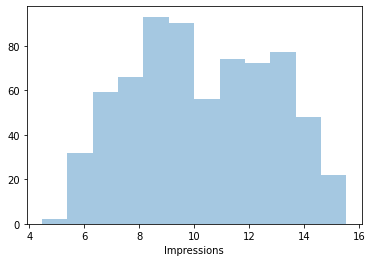

In [46]:
sns.distplot(conversion_fb.Impressions, kde = False)

In [50]:
conversion["ctr"] = conversion.Clicks/conversion.Impressions

In [56]:
conversion_916 = conversion.query("xyz_campaign_id == 916")

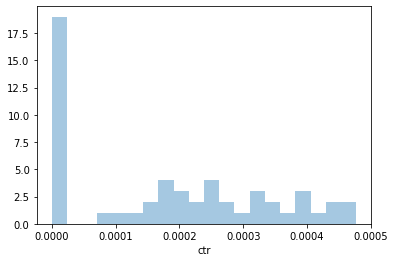

In [59]:
conversion_916

sns.distplot(conversion_916.ctr, kde = False, bins=20)

In [60]:
conversion["cpc"] = conversion.Spent/conversion.Clicks

In [63]:
conversion_cpc = conversion.dropna()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


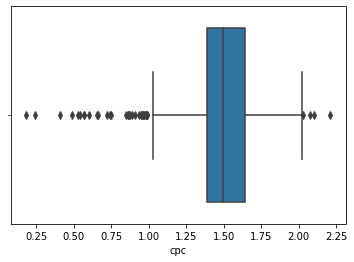

In [64]:
sns.boxplot(conversion_cpc["cpc"])

In [67]:
ss.iqr(conversion_cpc["cpc"])

0.25436369905

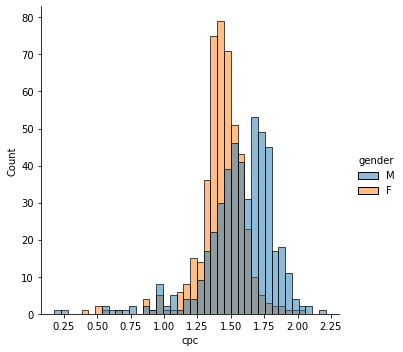

In [72]:
sns.displot(x = conversion_cpc["cpc"], hue = conversion_cpc["gender"], kde = False)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


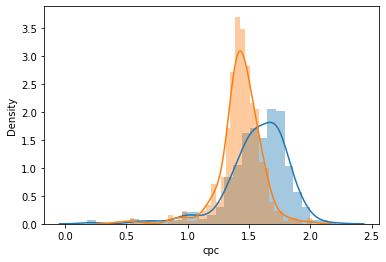

In [78]:
conversion_cpc_m = conversion_cpc.query("gender == 'M'")
conversion_cpc_f = conversion_cpc.query("gender == 'F'")
sns.distplot(conversion_cpc_m["cpc"])
sns.distplot(conversion_cpc_f["cpc"])

In [80]:
conversion.head()
#клики – Clicks, покупки – Approved_Conversion.

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [89]:
conversion["cr_r"] = conversion.Approved_Conversion/conversion.Clicks

In [94]:
conversion.query("ad_id == 1121814").cr_r.mul(100).round(2)

860    3.09
Name: cr_r, dtype: float64